In [ ]:
try:
    import cv2
except:
    %pip install opencv-python-headless==4.9.0.80
    
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm import tqdm
import re
import json
import pandas as pd
from datetime import datetime
from multiprocessing import Pool, cpu_count

import numpy as np
from IPython.display import display, Image
import time

print('import successfull')

In [ ]:
BASE_PATH = Path('/home/jovyan/work/videos/')
VIDEO_PATHS = list(BASE_PATH.rglob('*.MP4')) + list(BASE_PATH.rglob('*.mp4'))
CSV_PATHS = list(BASE_PATH.rglob('*.csv'))

T1_PATHS_str = [str(file) for file in VIDEO_PATHS if not re.search('gelöschte|clipped|T2', str(file))]
T1_PATHS = [Path(file) for file in T1_PATHS_str]

T2_PATHS_str = [str(file) for file in VIDEO_PATHS if not re.search('gelöschte|clipped|T1', str(file))]
T2_PATHS = [Path(file) for file in T2_PATHS_str]

ELAN = '_ELAN'
SYNC = '_sync'

idx_category = {
    0.0: 'neutral',
    1.1: 'negative',
    1.2: 'positive'
}
category_idx = {
    'neutral': 0.0,
    'negative': 1.1, 
    'positive': 1.2
}

print(len(T1_PATHS))
print(len(T2_PATHS))

In [51]:
video = str(T1_PATHS[0])

video

'/home/jovyan/work/videos/S001/T1/Videos/START_S001_T1_La1.MP4'

In [56]:
frames = []

cap = cv2.VideoCapture(video)        
fps, num_frames = int(cap.get(cv2.CAP_PROP_FPS)), int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

pos_frame = cap.get(cv2.CAP_PROP_POS_FRAMES)

while True:
    frame_ready, frame = cap.read()
    if frame_ready:
        frames.append(frame)
    if not frame_ready:
        break

In [57]:
len(frames)

8760

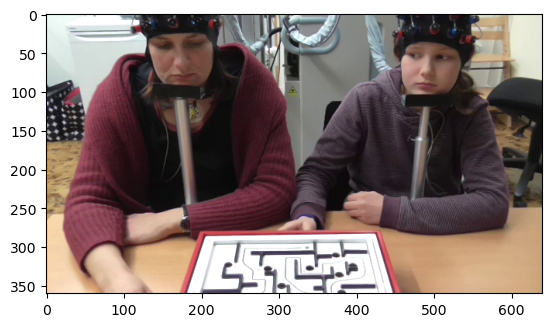

335 0.0


In [ ]:
from IPython.display import clear_output

for i in range(75, num_frames, 10):
    plt.imshow(cv2.cvtColor(frames[i], cv2.COLOR_BGR2RGB))
    plt.show()
    print(i, cap.get(cv2.CAP_PROP_POS_MSEC))
    
    # Wait for user input to proceed to the next frame
    input("Press Enter to continue...")
    clear_output(wait=True)

    

In [ ]:
while True:
    frame_ready, frame = cap.read() # get the frame
    if frame_ready:
        # The frame is ready and already captured
        # cv2.imshow('video', frame)

        # store the current frame in as a numpy array
        np_frame = cv2.imread('video', frame)
        images.append(np_frame)
        
        pos_frame = cap.get(cv2.cv.CV_CAP_PROP_POS_FRAMES)
    else:
        # The next frame is not ready, so we try to read it again
        cap.set(cv2.cv.CV_CAP_PROP_POS_FRAMES, pos_frame-1)
        print "frame is not ready"
        # It is better to wait for a while for the next frame to be ready
        cv2.waitKey(1000)

    if cv2.waitKey(10) == 27:
        break
    if cap.get(cv2.cv.CV_CAP_PROP_POS_FRAMES) == cap.get(cv2.cv.CV_CAP_PROP_FRAME_COUNT):
        # If the number of captured frames is equal to the total number of frames,
        # we stop
        break

all_frames = np.array(images)

In [ ]:
video_path = str(video)

cap = cv2.VideoCapture(video_path)
display_handle=display(None, display_id=True)
kernel = np.ones((5,5),np.float32)/25


    while True:
        start = time.time()
        _, frame = cap.read()
        # frame = cv2.flip(frame, 1) # if your camera reverses your image
        frame = cv2.filter2D(frame,-1,kernel)
        _, frame = cv2.imencode('.jpeg', frame)
        plt.imshow(frame, cmap='gray')
        plt.show()
        end = time.time()
        fps = 1/(end-start)
        display_handle.update(Image(data=frame.tobytes()))
        break
except KeyboardInterrupt:
    pass
finally:
    video.release()
    display_handle.update(None)